In [10]:
%cd ~/ChestXray-14/
file = "~/ChestXray-14/dataset/ChestXray NIH/preprocessed_data.csv"

/home/jovyan/ChestXray-14


In [11]:
import pandas as pd

In [12]:
df = pd.read_csv(file)
df.head()

,Unnamed: 0,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
0,dataset/ChestXray NIH/images_001/images/000000...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,dataset/ChestXray NIH/images_001/images/000000...,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,dataset/ChestXray NIH/images_001/images/000000...,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
3,dataset/ChestXray NIH/images_001/images/000000...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,dataset/ChestXray NIH/images_001/images/000000...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [87]:
def get_img_from_label(label, index):
    col_names = df[df[label] == 1].drop('Unnamed: 0', axis=1).iloc[index].index
    print(", ".join(col_names[df[df[label] == 1].drop('Unnamed: 0', axis=1).iloc[index].values]))
    return df[df[label] == 1].iloc[index]["Unnamed: 0"]
    
get_img_from_label('Fibrosis', 5)

Infiltration, Fibrosis, Nodule


'dataset/ChestXray NIH/images_001/images/00000053_000.png'

In [88]:
cxr = {}
def cxr_append(x): 
    cxr[x] = df[df[x] == 1].iloc[0]["Unnamed: 0"]
    
cxr_append('Atelectasis')
cxr_append('Cardiomegaly')
cxr_append('Effusion')
cxr_append('Infiltration')
cxr_append('Mass')
cxr_append('Nodule')
cxr_append('Pneumonia')
cxr_append('Pneumothorax')
cxr_append('Consolidation')
cxr_append('Edema')
cxr_append('Emphysema')
cxr_append('Fibrosis')
cxr_append('Pleural_Thickening')
cxr_append('Hernia')
cxr_append('No Finding')

cxr['Atelectasis, Infiltration, Edema, Effusion'] = get_img_from_label('Atelectasis', 9)
cxr['Infiltration, Edema, Effusion, Pneumonia, Cardiomegaly'] = get_img_from_label('Pneumonia', 9)
cxr['Atelectasis, Pneumonia'] = get_img_from_label('Pneumonia', 50)
cxr['Emphysema, Cardiomegaly'] = get_img_from_label('Cardiomegaly', 5)
cxr['Infiltration, Fibrosis, Nodule'] = get_img_from_label('Fibrosis', 5)

Atelectasis, Infiltration, Edema, Effusion
Infiltration, Edema, Effusion, Pneumonia, Cardiomegaly
Atelectasis, Pneumonia
Emphysema, Cardiomegaly
Infiltration, Fibrosis, Nodule


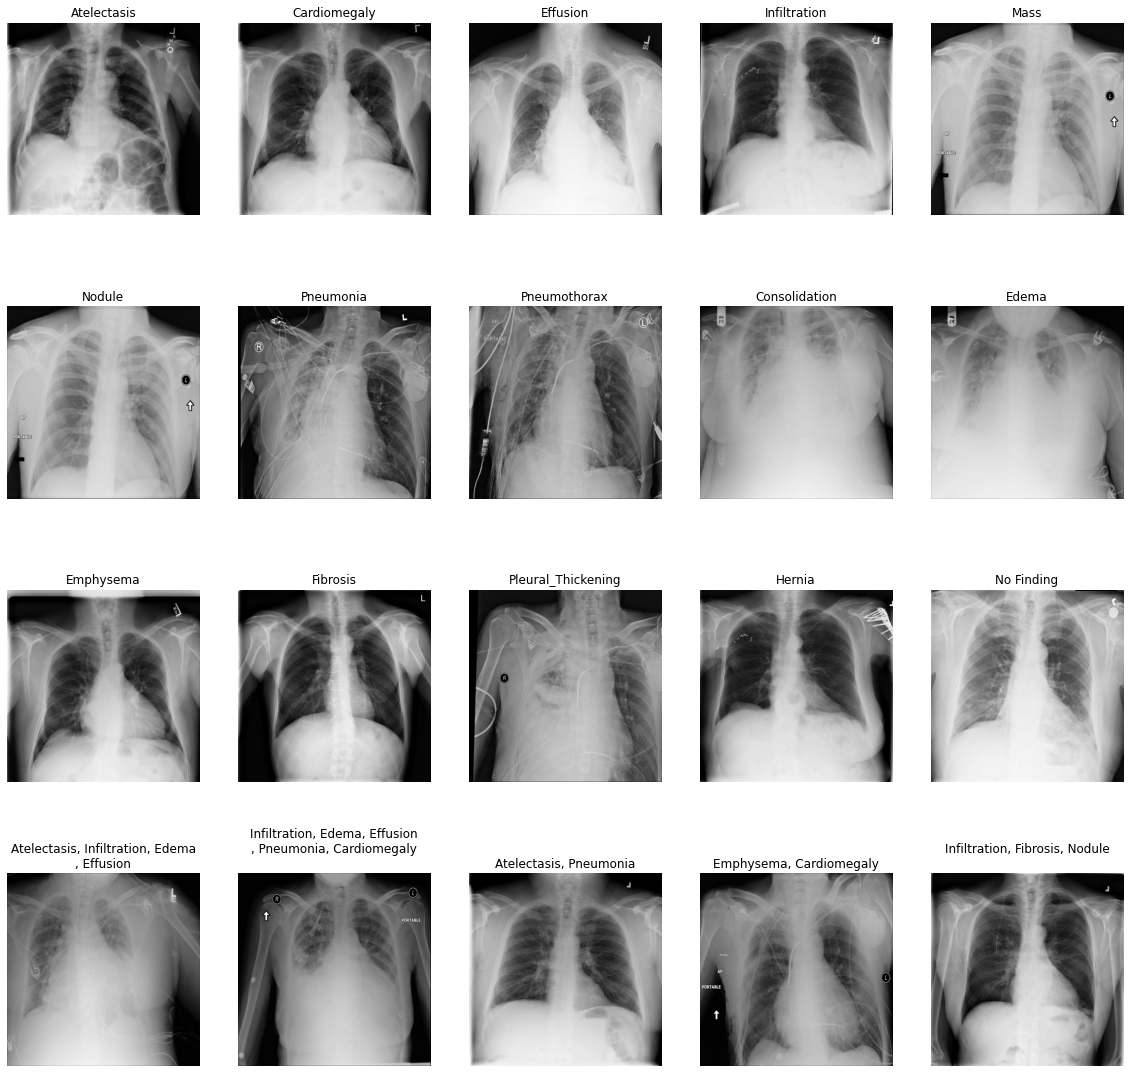

In [121]:
import matplotlib.pyplot as plt

def img_show(label, no):
    def new_label(x):
        label_list = x.split(", ")
        
        x_new = None
        for idx, value in enumerate(label_list):
            if not x_new:
                x_new = value
            else:
                x_new = x_new + ", " + value
                if not idx % 2:
                    x_new = x_new + "\n"
        
        return x_new
    
    plt.subplot(4,5,no)
    plt.imshow(plt.imread(cxr[label]),
              cmap='gray')
    plt.axis(False)
    plt.title(new_label(label))

plt.figure(figsize=(20,20))
for number, label in enumerate(cxr):
    img_show(label, number+1)

plt.savefig("Labels images.png")
"Ending";